In [21]:
import tensorflow as tf

# Load the MNIST dataset
#mnist = tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape input data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
# Train the model
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7784 - loss: 0.6091 - val_accuracy: 0.8776 - val_loss: 0.3437
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8867 - loss: 0.3056 - val_accuracy: 0.8932 - val_loss: 0.2878


In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8952 - loss: 0.2910
Test accuracy: 0.8931999802589417


In [17]:
# Make predictions
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_classes))

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.81      0.85      0.83      1000
           3       0.88      0.91      0.90      1000
           4       0.81      0.86      0.83      1000
           5       0.99      0.94      0.97      1000
           6       0.75      0.64      0.69      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



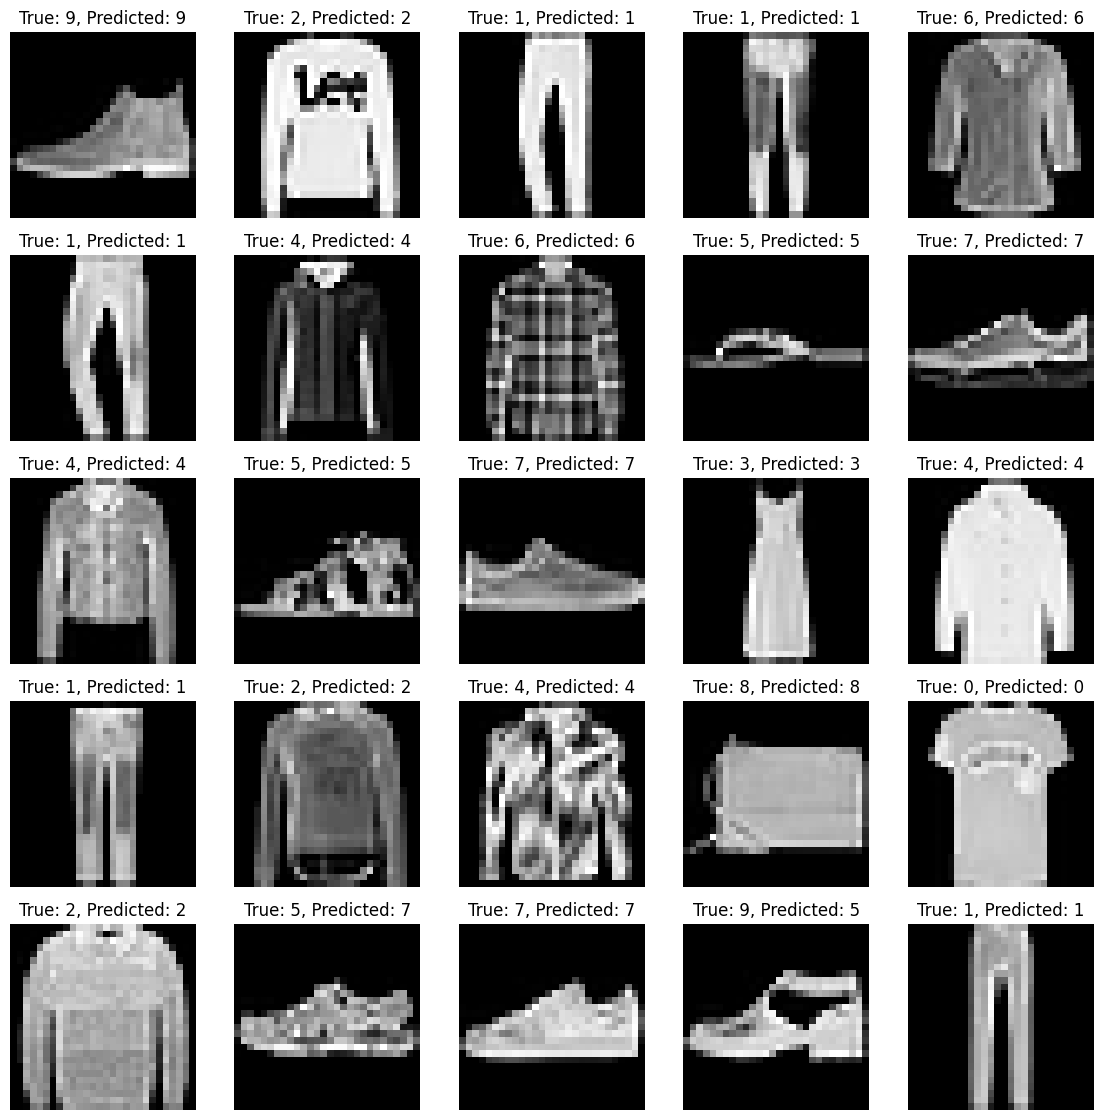

In [19]:
import matplotlib.pyplot as plt

# Plot some sample images with true and predicted labels
plt.figure(figsize=(14, 14))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

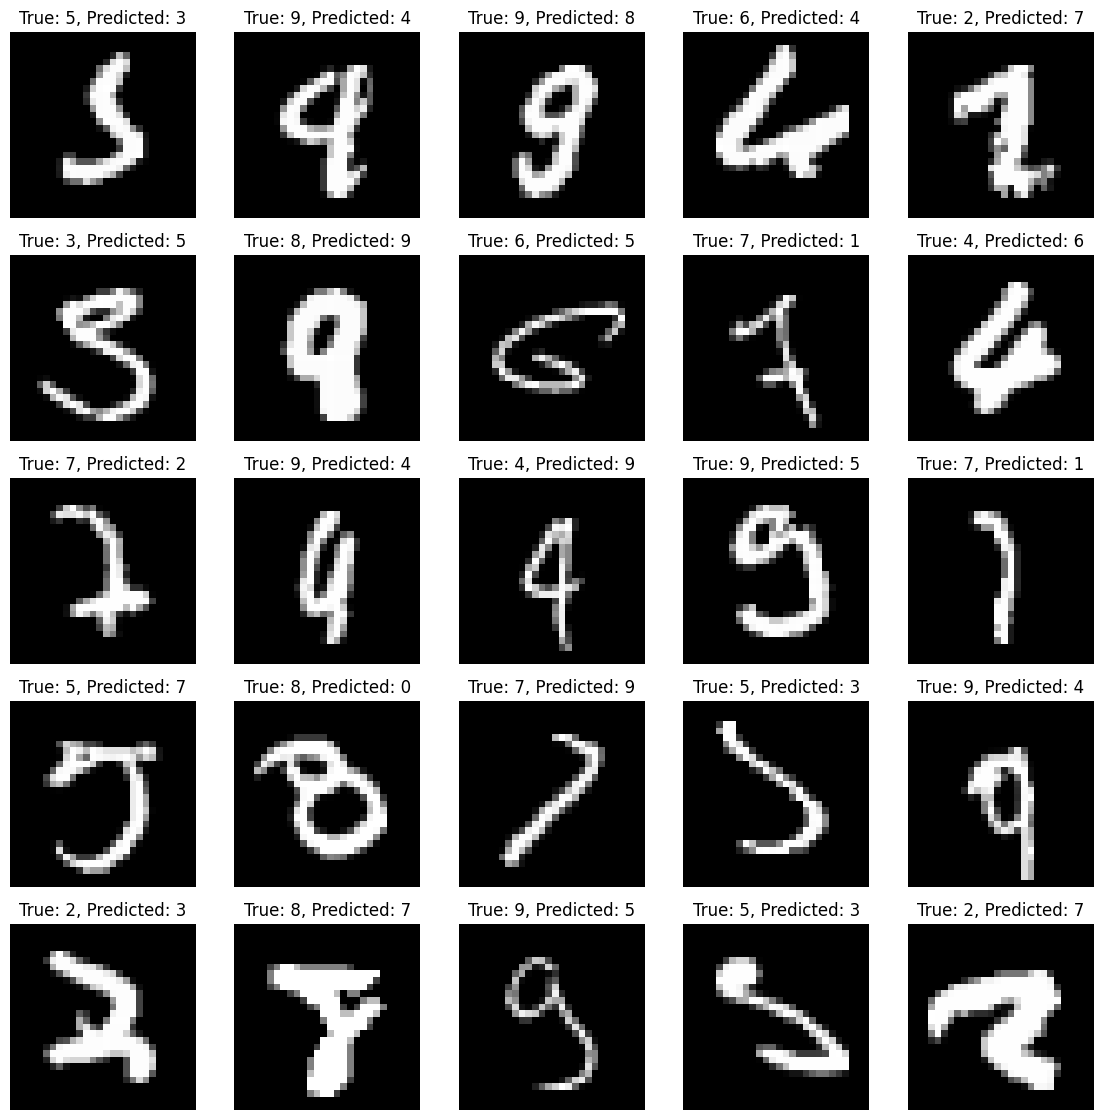

In [12]:
# Find misclassified samples
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Plot some misclassified images
plt.figure(figsize=(14, 14))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predicted_classes[idx]}')
    plt.axis('off')
plt.show()